<a href="https://colab.research.google.com/github/grahamwaters/Recursive_ERSGAN_Enhancer/blob/main/Waters_Photo_Enhancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESRGAN for increasing resolution**
####**-SEEMS TO ONLY WORK CONSISTENTLY ON CHROME!!**
#### **-DOUBLE CHECK YOUR RUNTIME TYPE IS SET TO GPU**
example: an image with height 500px by width 500px scaled to an image with height 1762px by width 1762px

**You might need to go to Runtime>Restart Runtime**

If you open the folder icon (in the left menu) you will see all your files, the good thing about doing **Runtime>Restart Runtime** is that it keeps all the files you downloaded but Restarts the Memory on the Cloud Computer so you can put the ESRGAN model in memory, compared to **Runtime>Factory Reset Runtime** which Restarts the whole Cloud Computer to a default clear state.


In [ ]:
#@markdown # **1) Download required Libraries**
# # Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 682, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 682 (delta 4), reused 11 (delta 2), pack-reused 665
Receiving objects: 100% (682/682), 5.03 MiB | 36.55 MiB/s, done.
Resolving deltas: 100% (359/359), done.
/content/Real-ESRGAN/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running develop
running egg_info
creating realesrgan.egg-info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing to

In [ ]:
!pip install tqdm
import tqdm
from tqdm import tqdm
!pip install cv2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
#@markdown # **2) Run this block and Upload image using the DIALOG box! Wait till it loads the image and once it's done run the next block**
#@markdown You can drag and drop into choose files button

%cd /content/Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
%cd ..



/content/Real-ESRGAN


Saving saturn2.jpg to saturn2.jpg
move saturn2.jpg to upload/saturn2.jpg
/content


In [ ]:
#@title utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob


In [ ]:
#@markdown # **3) Run ERSGAN on Uploaded Image**
#%cd ..
%cd Real-ESRGAN
import time

'''
for epoch in range(1,20):
    line = f'if epoch == {epoch}\n     !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale {epoch}  # if faces include --face_enhance'
    print(line)
    time.sleep(1)

'''

mode = 'recursive_improvement'
print("checking mode...")
time.sleep(1)
epoch = 1
if mode == 'recursive_improvement':
  running = True
  
  while running:
    print(f"running epoch:{epoch}")
    try:
      #!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 1  # if faces include --face_enhance
      if epoch == 1:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 1  # if faces include --face_enhance
      if epoch == 2:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 2  # if faces include --face_enhance
      if epoch == 3:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3  # if faces include --face_enhance
      if epoch == 4:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4  # if faces include --face_enhance
      if epoch == 5:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 5  # if faces include --face_enhance
      if epoch == 6:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 6  # if faces include --face_enhance
      if epoch == 7:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 7  # if faces include --face_enhance
      if epoch == 8:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 8  # if faces include --face_enhance
      '''
      if epoch == 9:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 9  # if faces include --face_enhance
      if epoch == 10:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 10  # if faces include --face_enhance
      if epoch == 11:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 11  # if faces include --face_enhance
      if epoch == 12:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 12  # if faces include --face_enhance
      if epoch == 13:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 13  # if faces include --face_enhance
      if epoch == 14:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 14  # if faces include --face_enhance
      if epoch == 15:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 15  # if faces include --face_enhance
      if epoch == 16:
          !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 16  # if faces include --face_enhance
      '''

      #print(f"successfully outscaled this file to --{epoch}")
      #finished = input("stop? y/n")
      #if finished == 'y':
      #  break
    except Exception as e:
      print(e)
      try:
        !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 5 --half # if faces include --face_enhance
      except Exception as e:
        print(f"reached the enhancement limit for this photo at epoch:{epoch}")
        running = False
        print(e)  
        break
    if epoch>20:
      break
    epoch+=1
else:
  print(f"running single epoch:{epoch}")
  try:
    !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 5  # if faces include --face_enhance
    print("successfully outscaled all files to --5")
  except Exception as e:
    print(e)
    try:
      !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 5 --half # if faces include --face_enhance
    except Exception as e:
      print(f"finished the enhancement for this photo at epoch:{epoch}")
      running = False
      print(e)  
    epoch+=1
    


#!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --half --face_enhance
#!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 5 --half
#!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 1 --half 
# !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
%cd ..

/content/Real-ESRGAN
checking mode...
running epoch:1
Testing 0 saturn2
running epoch:2
Testing 0 saturn2
running epoch:3
Testing 0 saturn2
running epoch:4
Testing 0 saturn2
running epoch:5
Testing 0 saturn2
running epoch:6
Testing 0 saturn2
running epoch:7
Testing 0 saturn2
running epoch:8
Testing 0 saturn2
running epoch:9
running epoch:10
running epoch:11
running epoch:12
running epoch:13
running epoch:14
running epoch:15
running epoch:16
running epoch:17
running epoch:18
running epoch:19
running epoch:20
running epoch:21
/content


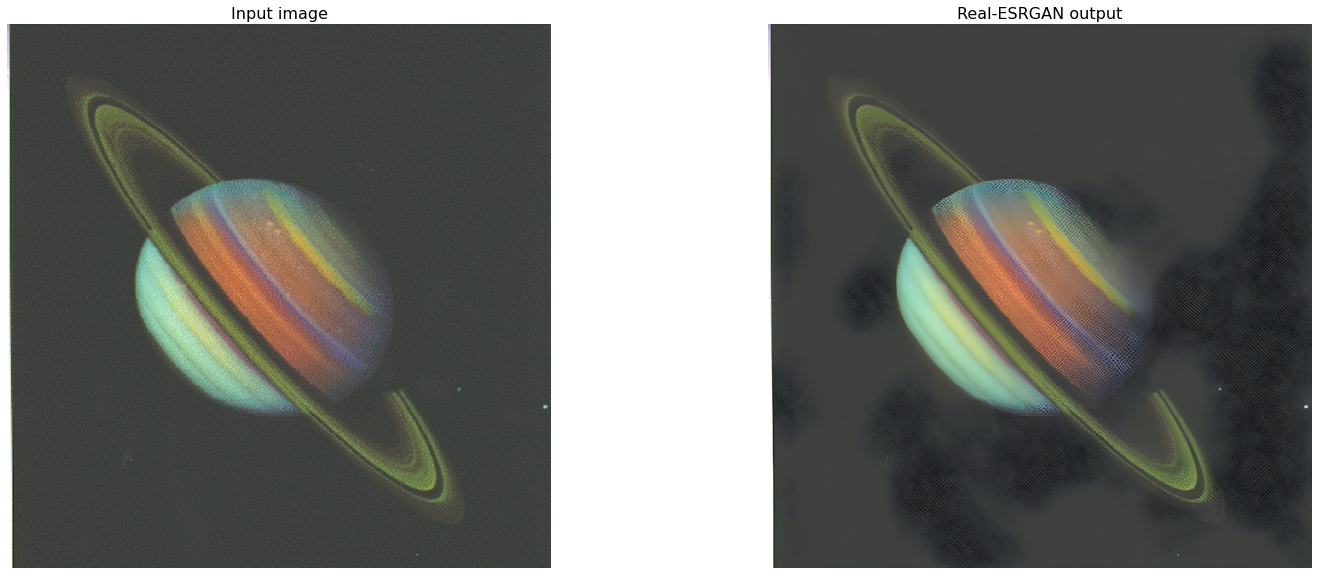

In [ ]:
#@markdown # **4) Compare before ESRGAN and after ESRGAN image** (Optional. You can skip this block if you want to)

input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
#@markdown # **5) Download Super Enhanced Image(s)**
import time
from google.colab import files
results_folder = '/content/Real-ESRGAN/results'
folder = os.listdir('/content/Real-ESRGAN/results')
%cd ..
%cd '/content/Real-ESRGAN/results'
for this_file in folder:
  files.download('/content/Real-ESRGAN/results/'+this_file) # had [0]
  time.sleep(1)

/
/content/Real-ESRGAN/results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>